In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import History
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = datasets.load_diabetes()

target = pd.DataFrame(data.target)

features = pd.DataFrame(data.data, columns = data.feature_names)

print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [4]:
print(len(features["age"].unique()))

58


In [5]:
print(len(features["sex"].unique()))

2


In [6]:
print(features["sex"])

0      0.050680
1     -0.044642
2      0.050680
3     -0.044642
4     -0.044642
         ...   
437    0.050680
438    0.050680
439    0.050680
440   -0.044642
441   -0.044642
Name: sex, Length: 442, dtype: float64


In [7]:
print(len(features["bmi"].unique()))

163


In [8]:
target.dtypes

0    float64
dtype: object

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, random_state = 2)

In [10]:
mean_sales = ytest.mean()
print("Average Sales :",mean_sales)

Average Sales : 0    155.207207
dtype: float64


In [11]:
print("MAE for Test Data:",abs(ytest/mean_sales * 100).mean()[0])

MAE for Test Data: 99.99999999999999


In [12]:
ytest = np.array(ytest[0]).reshape(-1, 1)
ytrain = np.array(ytrain[0]).reshape(-1, 1)
ytrain.shape
ytest.shape

(111, 1)

In [14]:
model = Sequential()
model.add(Dense(1000, input_dim = 10, activation = "relu"))
model.add(Dense(1000))
model.add(Activation("relu"))
model.add(Dense(1000))
model.add(Activation("relu"))
model.add(Dense(1, activation = "linear"))
model.add(Activation("linear"))

In [15]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mean_absolute_percentage_error"])

history = model.fit(xtrain.values, ytrain, batch_size = 32, epochs = 10, validation_data = (xtest.values, ytest))

native : compiler/mlir/mlir_graph_optimization_pass.cc:185 None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
11/11 [==============================] - 4s 221ms/step - loss: 28220.1875 - mean_absolute_percentage_error: 97.7153 - val_loss: 24949.6973 - val_mean_absolute_percentage_error: 88.1291
Epoch 2/10
11/11 [==============================] - 2s 193ms/step - loss: 15912.5557 - mean_absolute_percentage_error: 61.1569 - val_loss: 4352.1230 - val_mean_absolute_percentage_error: 56.7634
Epoch 3/10
11/11 [==============================] - 2s 186ms/step - loss: 5240.5371 - mean_absolute_percentage_error: 67.1096 - val_loss: 3812.2578 - val_mean_absolute_percentage_error: 38.2313
Epoch 4/10
11/11 [==============================] - 2s 187ms/step - loss: 3927.7957 - mean_absolute_percentage_error: 37.6251 - val_loss: 3597.9048 - val_mean_absolute_percentage_error: 43.2678
Epoch 5/10
11/11 [==============================] - 2s 185ms/step - loss: 3300.2209 - mean_absolute_percentage_error: 43.9098 - val_loss: 3061.9443 - val_mean_absolute_percentage_error: 36.4393
Epoch 6/10
11/11 [=========

In [16]:
result = model.evaluate(xtest.values, ytest)
result

4/4 [==============================] - 0s 85ms/step - loss: 2931.5515 - mean_absolute_percentage_error: 35.0788


[2931.551513671875, 35.07876205444336]

In [17]:
model.metrics_names

['loss', 'mean_absolute_percentage_error']

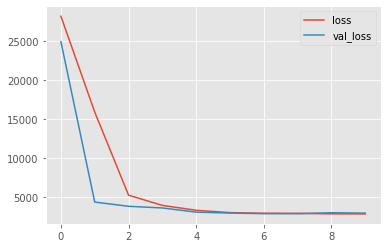

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()

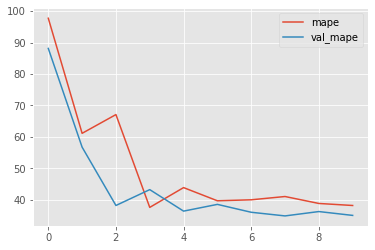

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["mean_absolute_percentage_error"])
plt.plot(history.history["val_mean_absolute_percentage_error"])
plt.legend(["mape", "val_mape"])
plt.show()

In [20]:
model.save("keras_regression_model.h5")

In [21]:
pred = model.predict(xtest.values)

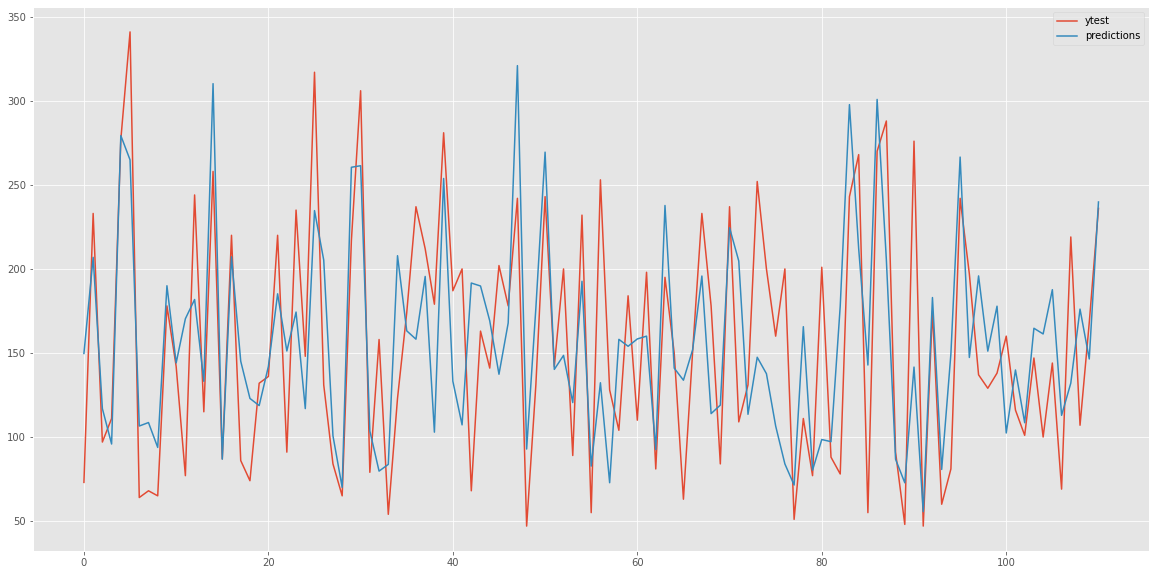

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(ytest)
plt.plot(pred)
plt.legend(["ytest", "predictions"])
plt.show()

the predictions are quite close to the actual results